In [2]:
import gdsfactory as gf
import matplotlib.pyplot as plt
import numpy as np
import tidy3d as td

import gplugins as gp
import gplugins.tidy3d as gt
from gplugins import plot
from gplugins.common.config import PATH

gt.material_name_to_medium

{'si': Medium(attrs={}, name='Si', frequency_range=None, allow_gain=False, nonlinear_spec=None, modulation_spec=None, heat_spec=None, type='Medium', permittivity=12.0409, conductivity=0.0),
 'sio2': Medium(attrs={}, name='SiO2', frequency_range=None, allow_gain=False, nonlinear_spec=None, modulation_spec=None, heat_spec=None, type='Medium', permittivity=2.1609, conductivity=0.0),
 'sin': Medium(attrs={}, name='SiN', frequency_range=None, allow_gain=False, nonlinear_spec=None, modulation_spec=None, heat_spec=None, type='Medium', permittivity=4.0, conductivity=0.0)}

Text(0, 0.5, 'n')

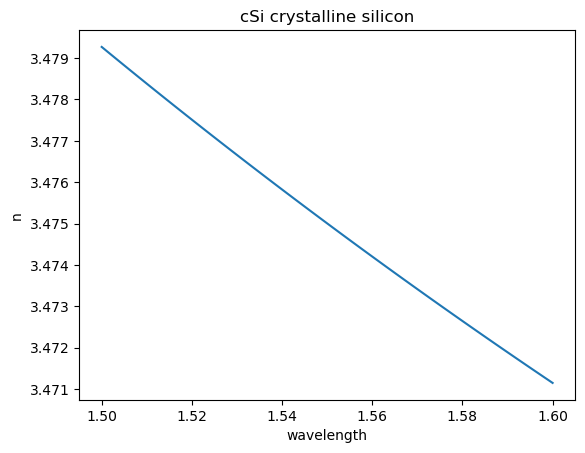

In [3]:
nm = 1e-3
wavelength = np.linspace(1500, 1600) * nm
f = td.C_0 / wavelength
eps_complex = td.material_library["cSi"]["Li1993_293K"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("cSi crystalline silicon")
plt.xlabel("wavelength")
plt.ylabel("n")

Text(0, 0.5, 'n')

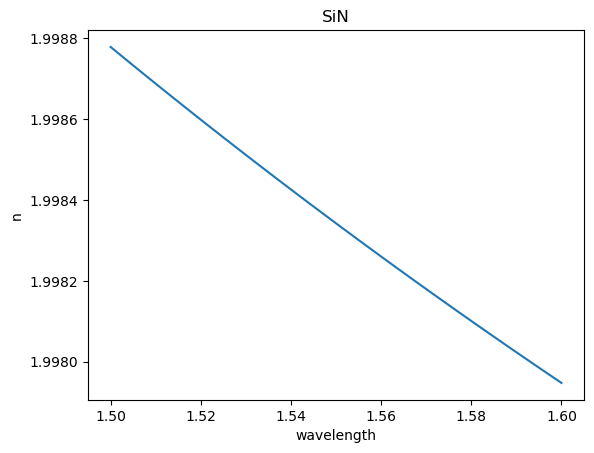

In [4]:
eps_complex = td.material_library["Si3N4"]["Luke2015PMLStable"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("SiN")
plt.xlabel("wavelength")
plt.ylabel("n")

Text(0, 0.5, 'n')

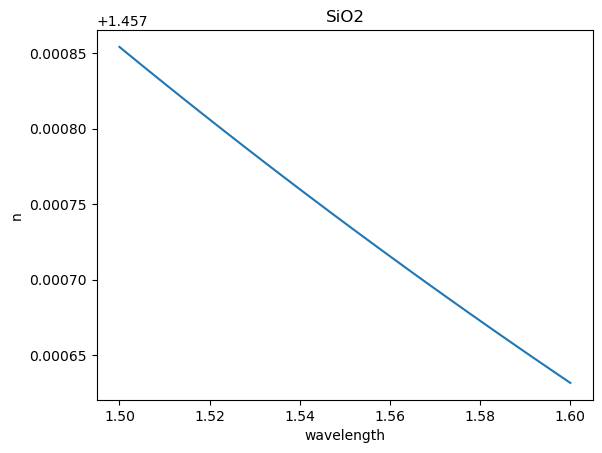

In [5]:
eps_complex = td.material_library["SiO2"]["Horiba"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("SiO2")
plt.xlabel("wavelength")
plt.ylabel("n")

2024-08-26 16:02:37.878 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/tmp/1277795034.gds'
2024-08-26 16:02:37.880 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.


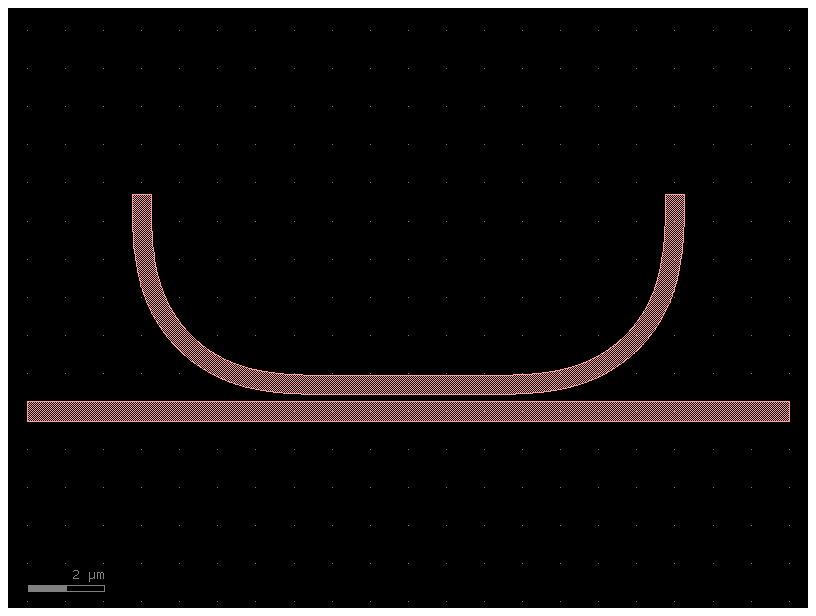

In [6]:
from gdsfactory.generic_tech import LAYER_STACK, get_generic_pdk

pdk = get_generic_pdk()
pdk.activate()

component = gf.components.coupler_ring()
component.plot()
component.show()

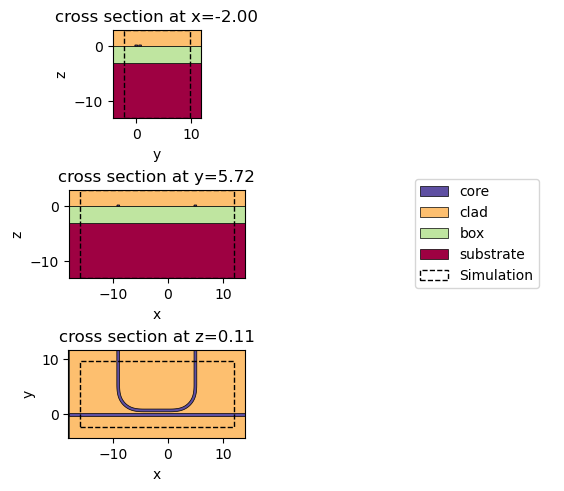

In [7]:
# define a mapping of pdk material names to tidy3d medium objects
mapping = {
    "si": td.Medium(name="Si", permittivity=3.47**2),
    "sio2": td.Medium(name="SiO2", permittivity=1.47**2),
}

# setup the tidy3d component
c = gt.Tidy3DComponent(
    component=component,
    layer_stack=LAYER_STACK,
    material_mapping=mapping,
    pad_xy_inner=2.0,
    pad_xy_outer=2.0,
    pad_z_inner=0,
    pad_z_outer=0,
    extend_ports=2.0,
)

# plot the component and the layerstack
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=3, width_ratios=(3, 1))
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
axl = fig.add_subplot(gs[1, 1])
c.plot_slice(x="core", ax=ax0)
c.plot_slice(y="core", ax=ax1)
c.plot_slice(z="core", ax=ax2)
axl.legend(*ax0.get_legend_handles_labels(), loc="center")
axl.axis("off")
plt.show()

16:03:02 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

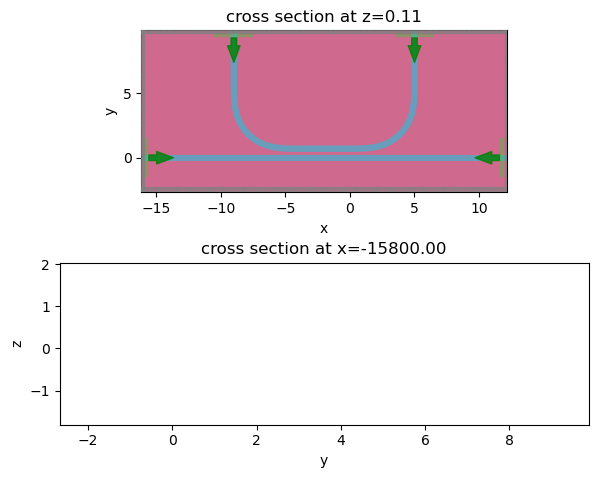

In [8]:
# initialize the tidy3d ComponentModeler
modeler = c.get_component_modeler(
    center_z="core", port_size_mult=(6, 4), sim_size_z=3.0
)

# we can plot the tidy3d simulation setup
fig, ax = plt.subplots(2, 1)
modeler.plot_sim(z=c.get_layer_center("core")[2], ax=ax[0])
modeler.plot_sim(x=c.ports[0].center[0], ax=ax[1])
fig.tight_layout()
plt.show()

In [9]:
sp = gt.write_sparameters(
    component,
    filepath=PATH.sparameters_repo / "coupler_ring_2d.npz",
    sim_size_z=0,
    center_z="core",
)

16:03:21 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

16:03:22 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

Output()

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              Started working on Batch containing 4 tasks.

16:03:23 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

ValueError: API key not found. To get your API key, sign into 'https://tidy3d.simulation.cloud' and copy it from your 'Account' page. Then you can configure tidy3d through command line 'tidy3d configure' and enter your API key when prompted. Alternatively, especially if using windows, you can manually create the configuration file by creating a file at their home directory '~/.tidy3d/config' (unix) or '.tidy3d/config' (windows) containing the following line: apikey = 'XXX'. Here XXX is your API key copied from your account page within quotes.

2024-08-26 16:03:58.212 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/tmp/3295663272.gds'
2024-08-26 16:03:58.212 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.


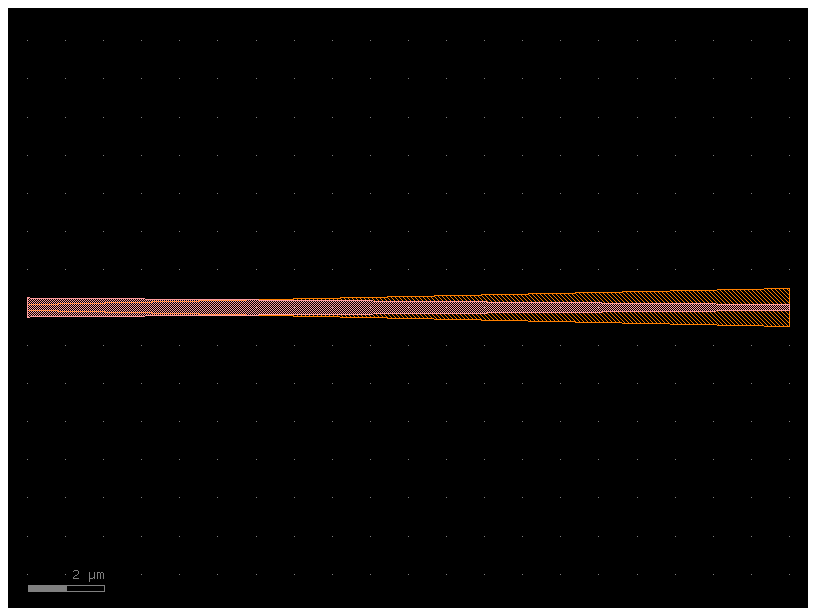

In [11]:
c = gf.components.taper_sc_nc()
c.plot()
c.show()

16:04:31 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

16:04:32 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: Use the remote mode solver with subpixel averaging for   
              better accuracy through 'tidy3d.plugins.mode.web.run(...)'.       

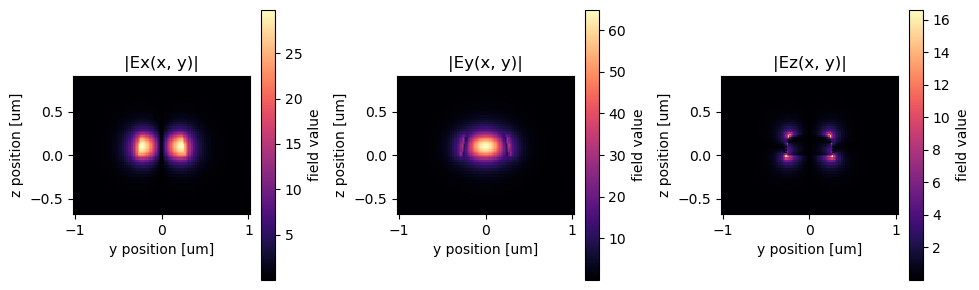

In [12]:
# lets plot the fundamental input mode
sp = gt.write_sparameters(
    c, plot_mode_port_name="o1", plot_mode_index=0, layer_stack=LAYER_STACK
)

In [13]:
import logging
import sys

import gdsfactory as gf
import matplotlib.pyplot as plt
import numpy as np
from gdsfactory.cross_section import rib
from gdsfactory.generic_tech import LAYER_STACK, get_generic_pdk
from gdsfactory.technology import LayerStack
from rich.logging import RichHandler
from tqdm.auto import tqdm

from gplugins.femwell.mode_solver import compute_cross_section_modes

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

logger = logging.getLogger()
logger.removeHandler(sys.stderr)
logging.basicConfig(level="WARNING", datefmt="[%X]", handlers=[RichHandler()])

In [14]:
filtered_layer_stack = LayerStack(
    layers={
        k: LAYER_STACK.layers[k]
        for k in (
            "core",
            "clad",
            "slab90",
            "box",
            # "substrate",
        )
    }
)

filtered_layer_stack.layers["core"].thickness = (
    0.22  # Perturb the layer_stack before simulating
)

filtered_layer_stack.layers["slab90"].thickness = (
    0.09  # Perturb the layer_stack before simulating
)

resolutions = {
    "core": {"resolution": 0.02, "distance": 1, "SizeMax": 0.2},
    # "clad": {"resolution": 0.2, "distance": 1},
    # "box": {"resolution": 0.2, "distance": 1},
    # "slab90": {"resolution": 0.05, "distance": 1},
}

In [15]:
modes = compute_cross_section_modes(
    cross_section=rib(width=0.6),
    layer_stack=filtered_layer_stack,
    wavelength=1.55,
    num_modes=1,
    resolutions=resolutions,
    n_guess=2.630929889650573,
)

  0%|          | 0/2 [00:00<?, ?it/s]

Info    : Meshing 1D...nts - Splitting faces                                                                                 
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 7 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : Done meshing 1D (Wall 0.00190844s, CPU 0.003759s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00645576s, CPU 0.040188s)
Info    : 45 nodes 96 elements
Info    : Writing 'mesh.msh'...
Info    : Done writing 'mesh.msh'
Info    : Writing '/tmp/tmpyqm0iylz/mesh.msh'...
Info    : Done writing '/tmp/tmpyqm0iylz/mesh.msh'



/tmp/ipykernel_6343/1267607181.py:2: DeprecationWarning: The behavior of passing an array directly to `show` is deprecated and will be removed in the future. Use `plot` instead.
  mode.show(mode.E.real, colorbar=True, direction="x")


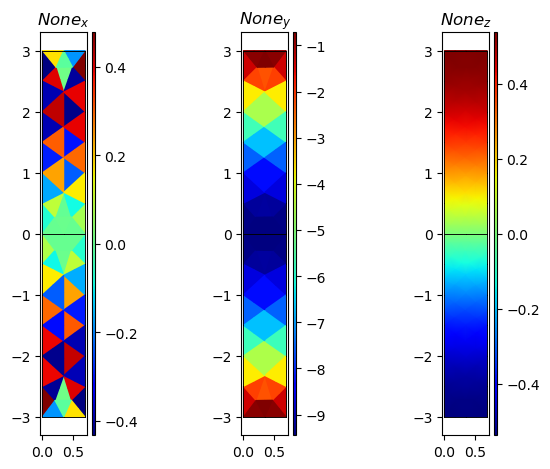

In [16]:
mode = modes[0]
mode.show(mode.E.real, colorbar=True, direction="x")

In [17]:
widths = np.linspace(0.2, 2, 10)
num_modes = 4
all_neffs = np.zeros((widths.shape[0], num_modes))
all_te_fracs = np.zeros((widths.shape[0], num_modes))


for i, width in enumerate(tqdm(widths)):
    modes = compute_cross_section_modes(
        cross_section=gf.cross_section.strip(width=width),
        layer_stack=filtered_layer_stack,
        wavelength=1.55,
        num_modes=num_modes,
        resolutions=resolutions,
        wafer_padding=2,
        solver="scipy",
    )
    all_neffs[i] = np.real([mode.n_eff for mode in modes])
    all_te_fracs[i, :] = [mode.te_fraction for mode in modes]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...                                                                                                      
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [  0%] Meshing curve 7 (Line)
Info    : [  0%] Meshing curve 8 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [  0%] Meshing curve 9 (Line)
Info    : [  0%] Meshing curve 10 (Line)
Info    : [  0%] Meshing curve 11 (Line)
Info    : [  0%] Meshing curve 12 (Line)
Info    : [  0%] Meshing curve 13 (Line)
Info    : [  0%] Meshing curve 14 (Line)
Info    : Done meshing 1D (Wall 0.0386439s, CPU 0.129061s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0157061s,

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...                                                                                                      
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 30%] Meshing curve 10 (Line)
Info    : [ 30%] Meshing curve 11 (Line)
Info    : [ 30%] Meshing curve 12 (Line)
Info    : [ 30%] Meshing curve 13 (Line)
Info    : [ 30%] Meshing curve 14 (Line)
Info    : Done meshing 1D (Wall 0.00954002s, CPU 0.031175s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0158706s

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...                                                                                                      
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 30%] Meshing curve 5 (Line)
Info    : [ 30%] Meshing curve 6 (Line)
Info    : [ 30%] Meshing curve 7 (Line)
Info    : [ 30%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 40%] Meshing curve 10 (Line)
Info    : [ 40%] Meshing curve 11 (Line)
Info    : [ 40%] Meshing curve 12 (Line)
Info    : [ 60%] Meshing curve 14 (Line)
Info    : [ 40%] Meshing curve 13 (Line)
Info    : Done meshing 1D (Wall 0.00746678s, CPU 0.049487s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0172355s

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...                                                                                                      
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 20%] Meshing curve 9 (Line)
Info    : [ 20%] Meshing curve 10 (Line)
Info    : [ 20%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : Done meshing 1D (Wall 0.0111739s, CPU 0.063245s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0455542s,

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...                                                                                                      
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : Done meshing 1D (Wall 0.0364901s, CPU 0.222428s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0229793s,

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...                                                                                                      
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [  0%] Meshing curve 8 (Line)
Info    : [  0%] Meshing curve 9 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 13 (Line)
Info    : [ 50%] Meshing curve 14 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [  0%] Meshing curve 7 (Line)
Info    : [  0%] Meshing curve 10 (Line)
Info    : [  0%] Meshing curve 11 (Line)
Info    : [  0%] Meshing curve 12 (Line)
Info    : [  0%] Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0.0328171s, CPU 0.172089s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.02237s, C

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...nts - Splitting faces                                                                                              
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [  0%] Meshing curve 7 (Line)
Info    : [  0%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 40%] Meshing curve 12 (Line)
Info    : [ 40%] Meshing curve 13 (Line)
Info    : Done meshing 1D (Wall 0.0147686s, CPU 0.096436s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0429835s, CPU 0.181404s)
Info    : 21

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...nts - Splitting faces                                                                                              
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [  0%] Meshing curve 7 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : Done meshing 1D (Wall 0.00686389s, CPU 0.051319s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0215602s, CPU 0.163651s)
Info    : 2

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...nts - Splitting faces                                                                                              
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : Done meshing 1D (Wall 0.014594s, CPU 0.095825s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.020533s, CPU 0.141264s)
Info    : 1925

  0%|          | 0/3 [00:00<?, ?it/s]

Info    : Meshing 1D...nts - Splitting faces                                                                                              
Info    : [  0%] Meshing curve 1 (Line)
Info    : [  0%] Meshing curve 2 (Line)
Info    : [  0%] Meshing curve 3 (Line)
Info    : [  0%] Meshing curve 5 (Line)
Info    : [  0%] Meshing curve 4 (Line)
Info    : [  0%] Meshing curve 6 (Line)
Info    : [  0%] Meshing curve 7 (Line)
Info    : [  0%] Meshing curve 8 (Line)
Info    : [  0%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : Done meshing 1D (Wall 0.0246664s, CPU 0.167207s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.019478s, CPU 0.143786s)
Info    : 176

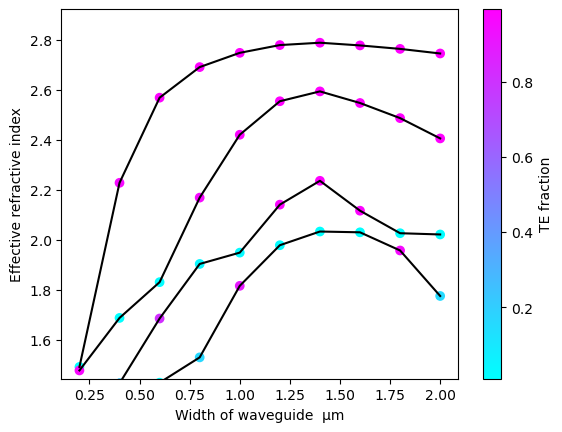

In [18]:
all_neffs = np.real(all_neffs)
plt.xlabel("Width of waveguide  µm")
plt.ylabel("Effective refractive index")
plt.ylim(1.444, np.max(all_neffs) + 0.1 * (np.max(all_neffs) - 1.444))
for lams, te_fracs in zip(all_neffs.T, all_te_fracs.T):
    plt.plot(widths, lams, c="k")
    plt.scatter(widths, lams, c=te_fracs, cmap="cool")
plt.colorbar().set_label("TE fraction")

In [21]:
import matplotlib.pyplot as plt
import numpy as np

import gplugins.tidy3d as gt

nm = 1e-3

print(gt.materials.MaterialSpecTidy3d)

gt.materials.get_index(
    3.4
)  # get the index of a material with a given refractive index float

float | int | str | tidy3d.components.medium.Medium | tidy3d.components.medium.CustomMedium | tidy3d.components.medium.PoleResidue | tuple[float, float] | tuple[str, str]


3.4

In [22]:
# get the index of a material with a name string, for the case that the refractive index has only one variant
gt.materials.get_index("AlxOy")

1.7830851366538996

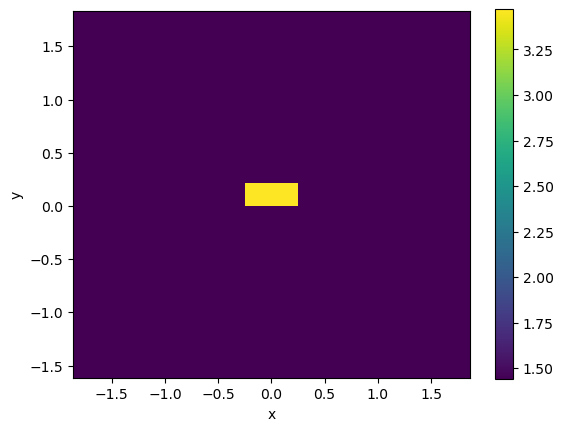

In [23]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.0,
    core_material=3.47,
    clad_material=1.44,
)
strip.plot_index()

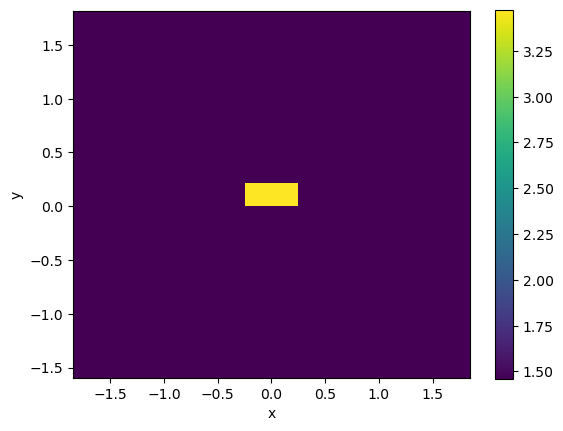

In [24]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
)
strip.plot_index()

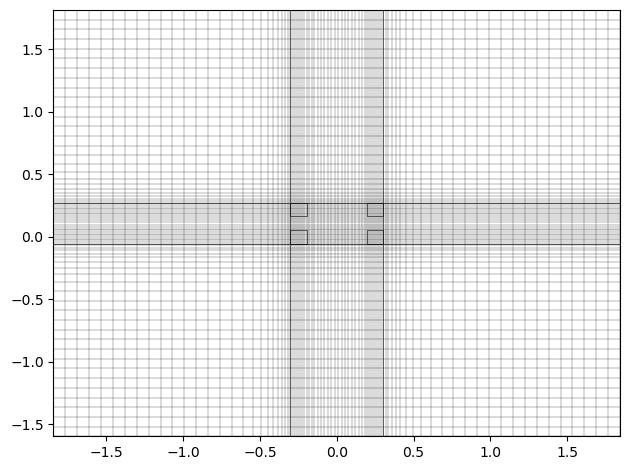

In [25]:
strip.plot_grid()

16:13:20 CEST WARNING: The group index was not computed. To calculate group     
              index, pass 'group_index_step = True' in the 'ModeSpec'.          

2024-08-26 16:13:20.785 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_501e0ae05a9d54ae.npz.


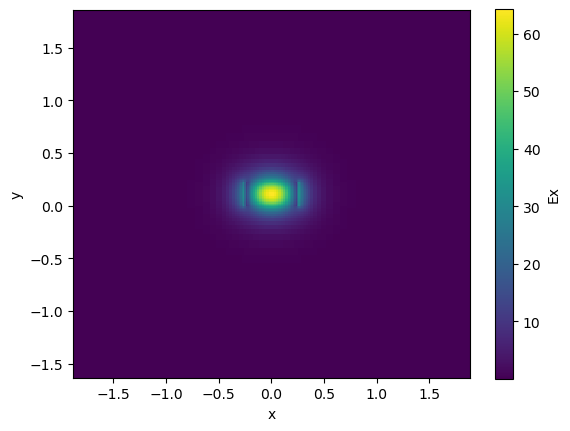

In [26]:
strip.plot_field(field_name="Ex", mode_index=0)  # TE

16:13:54 CEST WARNING: Mode field at frequency index 0, mode index 1 does not   
              decay at the plane boundaries.                                    

2024-08-26 16:13:54.044 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_db26ea49d579b4b0.npz.


array([2.67427418+3.10179974e-05j, 2.50854926+4.47861069e-05j])

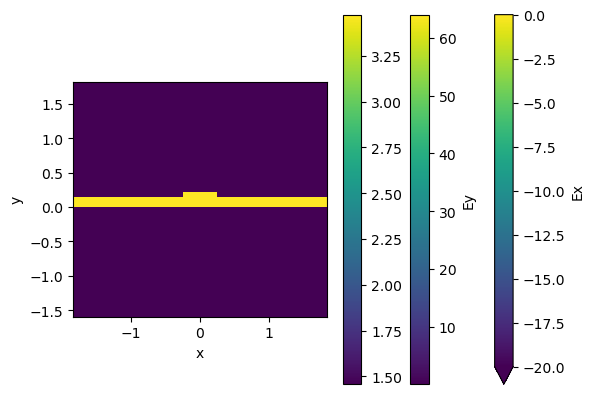

In [27]:
strip.plot_field(field_name="Ex", mode_index=0, value="dB")  # TE
strip.plot_field(field_name="Ey", mode_index=1)  # TM
strip.n_eff
rib = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.15,
    core_material="si",
    clad_material="sio2",
)
rib.plot_index()
rib.n_eff

  0%|          | 0/7 [00:00<?, ?it/s]

16:14:05 CEST WARNING: Mode field at frequency index 0, mode index 3 does not   
              decay at the plane boundaries.                                    

2024-08-26 16:14:05.534 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_d0bcc64d07024710.npz.


16:14:08 CEST WARNING: Mode field at frequency index 0, mode index 3 does not   
              decay at the plane boundaries.                                    

2024-08-26 16:14:08.278 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_33690cb584f84edf.npz.
2024-08-26 16:14:10.966 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_37121effbf0b6ebf.npz.
2024-08-26 16:14:12.321 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_25490c237688aea7.npz.
2024-08-26 16:14:14.290 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_20999b17b9dd0d20.npz.
2024-08-26 16:14:16.336 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_c387e2b7f5b76d1d.npz.
2024-08-26 16:14:17.522 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/hamed/.gdsfactory/modes/Waveguide_7c9157c3e1ad975e.npz.


  0%|          | 0/7 [00:00<?, ?it/s]

2024-08-26 16:14:17.539 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/hamed/.gdsfactory/modes/Waveguide_d0bcc64d07024710.npz.
2024-08-26 16:14:17.550 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/hamed/.gdsfactory/modes/Waveguide_33690cb584f84edf.npz.
2024-08-26 16:14:17.554 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/hamed/.gdsfactory/modes/Waveguide_37121effbf0b6ebf.npz.
2024-08-26 16:14:17.559 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/hamed/.gdsfactory/modes/Waveguide_25490c237688aea7.npz.
2024-08-26 16:14:17.561 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/hamed/.gdsfactory/modes/Waveguide_20999b17b9dd0d20.npz.
2024-08-26 16:14:17.564 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/hamed/.gdsfactory/modes/Waveguide_c387e2b7f5b76d1d.npz.
2024-08-26 16:14:17.565 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/hamed/.gdsfactory/mo

Text(0.5, 1.0, 'Effective index sweep')

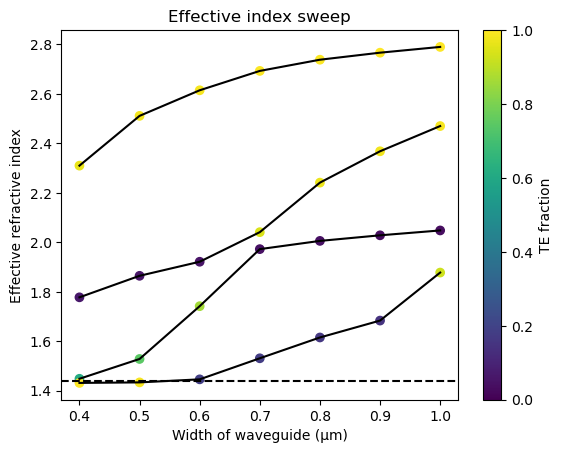

In [28]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    core_thickness=220 * nm,
    num_modes=4,
)
w = np.linspace(400 * nm, 1000 * nm, 7)
n_eff = gt.modes.sweep_n_eff(strip, core_width=w)
fraction_te = gt.modes.sweep_fraction_te(strip, core_width=w)

for i in range(4):
    plt.plot(w, n_eff.sel(mode_index=i).real, c="k")
    plt.scatter(
        w, n_eff.sel(mode_index=i).real, c=fraction_te.sel(mode_index=i), vmin=0, vmax=1
    )
plt.axhline(y=1.44, color="k", ls="--")
plt.colorbar().set_label("TE fraction")
plt.xlabel("Width of waveguide (µm)")
plt.ylabel("Effective refractive index")
plt.title("Effective index sweep")

In [1]:
import matplotlib.pyplot as plt
import meep as mp
import numpy as np

import gplugins.modes as gm

modes = gm.find_modes_waveguide(
    parity=mp.NO_PARITY,
    core_width=0.4,
    core_material=3.47,
    clad_material=1.44,
    core_thickness=0.22,
    resolution=20,  # Lowered resolution
    sy=3,
    sz=3,
    nmodes=4,
)

m1 = modes[1]
m2 = modes[2]
m3 = modes[3]

m1.plot_eps()


Using MPI version 4.1, 1 processes
2024-08-26 16:20:17.957 | INFO     | gplugins.gmeep:<module>:39 - Meep '1.29.0' installed at ['/home/hamed/anaconda3/lib/python3.11/site-packages/meep']


: 